In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [2]:
df1 = pd.read_csv('data/train_identity.csv.gz')
df2 = pd.read_csv('data/train_transaction.csv.gz')

In [3]:
# Using TransactionID as index for both data.
df1.set_index('TransactionID',inplace=True)
df2.set_index('TransactionID',inplace=True)

## Looking at the data to check out the values, null value count etc.

In [4]:
df1.head()

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [5]:
df1.info

<bound method DataFrame.info of                id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
TransactionID                                                              
2987004          0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
2987008         -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2987010         -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
2987011         -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
2987016          0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   
2987017         -5.0   61141.0    3.0    0.0    3.0    0.0    NaN    NaN   
2987022        -15.0       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2987038          0.0   31964.0    0.0    0.0    0.0  -10.0    NaN    NaN   
2987040        -10.0  116098.0    0.0    0.0    0.0    0.0    NaN    NaN   
2987048         -5.0  257037.0    NaN    NaN    0.0    0.0    NaN    NaN   
2987049         -5.0  287959.0    NaN    NaN    1.0  -11

In [6]:

df1.isnull().sum(axis=0)

id_01              0
id_02           3361
id_03          77909
id_04          77909
id_05           7368
id_06           7368
id_07         139078
id_08         139078
id_09          69307
id_10          69307
id_11           3255
id_12              0
id_13          16913
id_14          64189
id_15           3248
id_16          14893
id_17           4864
id_18          99120
id_19           4915
id_20           4972
id_21         139074
id_22         139064
id_23         139064
id_24         139486
id_25         139101
id_26         139070
id_27         139064
id_28           3255
id_29           3255
id_30          66668
id_31           3951
id_32          66647
id_33          70944
id_34          66428
id_35           3248
id_36           3248
id_37           3248
id_38           3248
DeviceType      3423
DeviceInfo     25567
dtype: int64

In [7]:
df1.shape

(144233, 40)

In [8]:
df2.head

<bound method NDFrame.head of                isFraud  TransactionDT  TransactionAmt ProductCD  card1  card2  \
TransactionID                                                                   
2987000              0          86400          68.500         W  13926    NaN   
2987001              0          86401          29.000         W   2755  404.0   
2987002              0          86469          59.000         W   4663  490.0   
2987003              0          86499          50.000         W  18132  567.0   
2987004              0          86506          50.000         H   4497  514.0   
2987005              0          86510          49.000         W   5937  555.0   
2987006              0          86522         159.000         W  12308  360.0   
2987007              0          86529         422.500         W  12695  490.0   
2987008              0          86535          15.000         H   2803  100.0   
2987009              0          86536         117.000         W  17399  111.0  

In [9]:
df2.info

<bound method DataFrame.info of                isFraud  TransactionDT  TransactionAmt ProductCD  card1  card2  \
TransactionID                                                                   
2987000              0          86400          68.500         W  13926    NaN   
2987001              0          86401          29.000         W   2755  404.0   
2987002              0          86469          59.000         W   4663  490.0   
2987003              0          86499          50.000         W  18132  567.0   
2987004              0          86506          50.000         H   4497  514.0   
2987005              0          86510          49.000         W   5937  555.0   
2987006              0          86522         159.000         W  12308  360.0   
2987007              0          86529         422.500         W  12695  490.0   
2987008              0          86535          15.000         H   2803  100.0   
2987009              0          86536         117.000         W  17399  111.0

In [10]:
df2.isnull().sum(axis=0)

isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8933
card3               1565
card4               1577
card5               4259
card6               1571
addr1              65706
addr2              65706
dist1             352271
dist2             552913
P_emaildomain      94456
R_emaildomain     453249
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
                   ...  
V310                  12
V311                  12
V312                  12
V313                1269
V314                1269
V315                1269
V316                  12
V317                  12
V318                  12


In [11]:
df2.shape

(590540, 393)

In [12]:
df1i = df1.index
df2i = df2.index

### Checking if the index we created is unique.
### And then checking which data is subset of the other, if at all.

In [37]:
# tests to check if the index is unique
df1i.is_unique

True

In [38]:
# tests to check if the index is unique
df2i.is_unique

True

In [15]:
# If this returns 0 rows df1 is a total subset of df2.
df1[~df1.index.isin(df2.index)]

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,


In [16]:
# These are indices in df2 and not in df1.
df2[~df2.index.isin(df1.index)].shape

(446307, 393)

### Validation of the above command.
### This should throw a KeyError because this index should be missing in df1 but available in df2.

df1.loc[2987001]


In [18]:
df1['isFraud'] = df2['isFraud']  #Add isFraud label to the identity DF

In [19]:
#How many items in df1 & df2 are fraud
df1_fraudRatio = df1[df1['isFraud'] == 1].shape[0]/df1.shape[0] #ratio of fraud to total items in identity DF
df2_fraudRatio = df2[df2['isFraud'] == 1].shape[0]/df2.shape[0] #ratio of fraud to total items in all transactions DF

In [20]:
df1_fraudRatio

0.07847025299342036

In [21]:
df2_fraudRatio

0.03499000914417313

# Looking into DF1 (Identity data)
## For each column: Look for intersection between NaN and isFraud. How many isFraud for colN==NaN? Betweeb colN == NaN and isFraud sets, is one a subset of the other.
### is there a point in doing this kind of EDA?

P = set(df1.index[df1['isFraud'] == 1].tolist())
colchk = 'id_24'
Q = set(df1.index[df1[colchk].apply(np.isnan)].tolist())

%matplotlib inline
plt.title('Intersection of Null {} and FRAUD cases'.format(colchk))
venn2([P,Q],set_labels=('Null_{}'.format(colchk),'isFraud'))

#Intersection of null values amongst a couple of features.

colchka = 'id_24'
colchkb = 'id_19'
R = set(df1.index[df1[colchka].apply(np.isnan)].tolist())
S = set(df1.index[df1[colchkb].apply(np.isnan)].tolist())
venn2([R,S],set_labels=('Null_{}'.format(colchka),'Null_{}'.format(colchkb)))

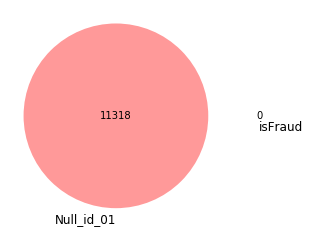

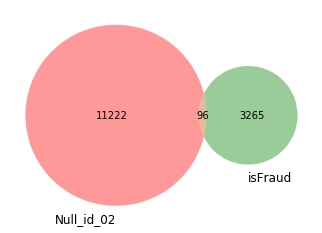

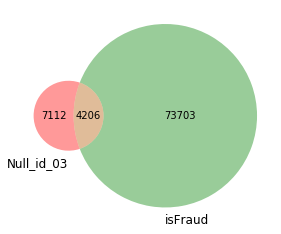

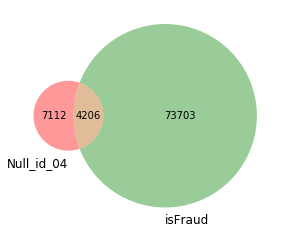

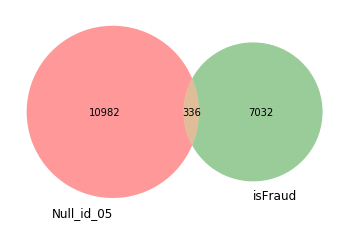

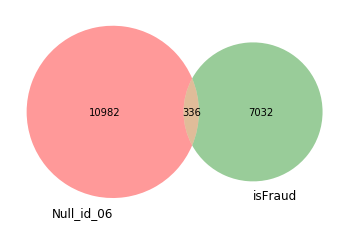

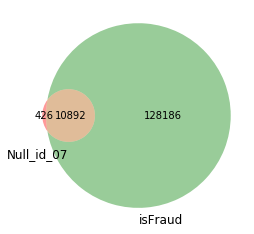

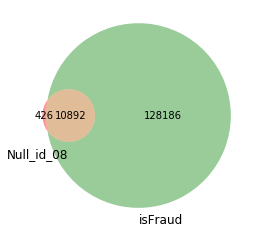

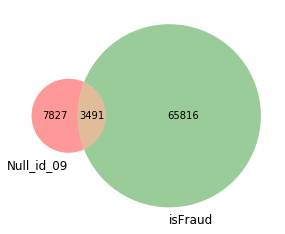

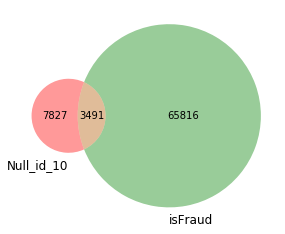

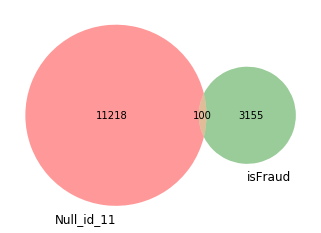

TypeError caught on id_12


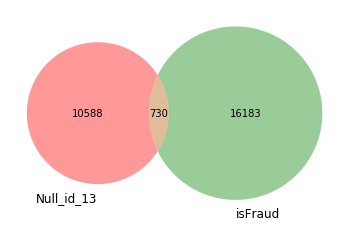

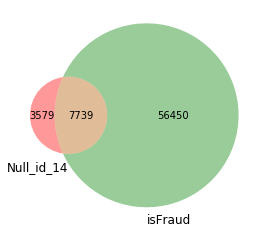

TypeError caught on id_15
TypeError caught on id_16


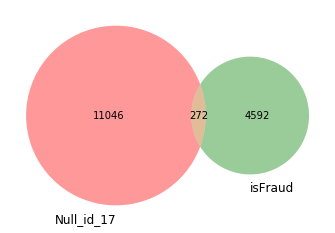

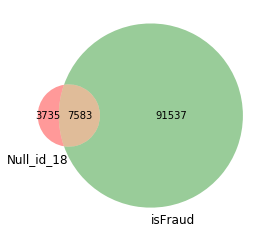

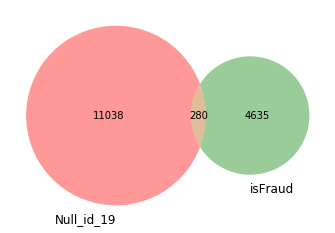

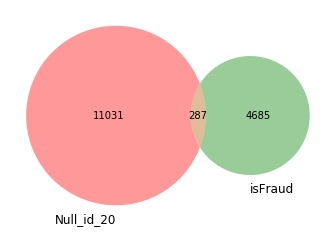

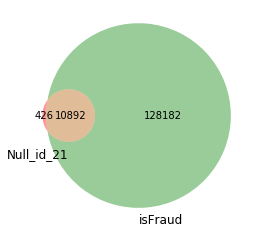

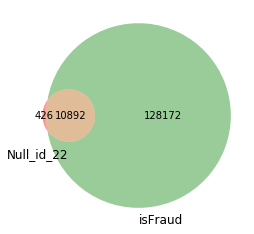

TypeError caught on id_23


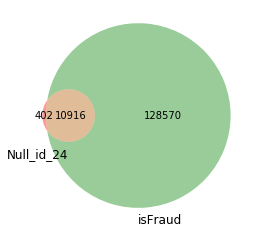

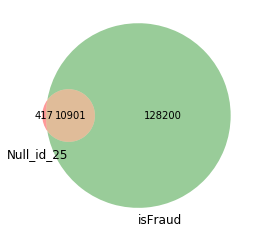

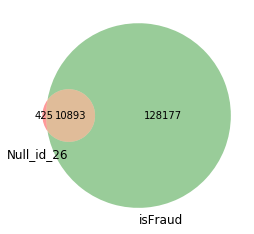

TypeError caught on id_27
TypeError caught on id_28
TypeError caught on id_29
TypeError caught on id_30
TypeError caught on id_31


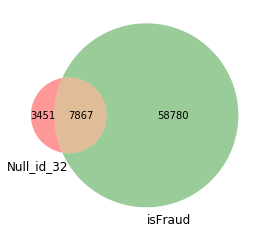

TypeError caught on id_33
TypeError caught on id_34
TypeError caught on id_35
TypeError caught on id_36
TypeError caught on id_37
TypeError caught on id_38
TypeError caught on DeviceType
TypeError caught on DeviceInfo


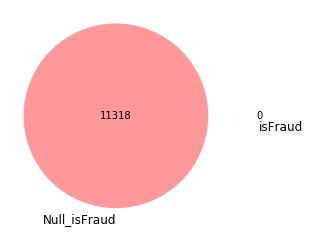

In [36]:
for colchk in df1.columns:
    try:
        venn2([set(df1.index[df1['isFraud'] == 1].tolist()),set(df1.index[df1[colchk].apply(np.isnan)].tolist())],set_labels=('Null_{}'.format(colchk),'isFraud'))
        plt.show()
    except (TypeError):
        # isnan is not working on some columns. 
        # just passing them by for now.. Perhaps we need to re-cast those items
        # as NaNs? Or is there a value in "NotFound" ??
        print('TypeError caught on {}'.format(colchk))